In [1]:
# IMPORTANDO AS BIBLIOTECAS QUE QUE SERÃO UTILIZADAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
import csv
from scipy import stats
from sklearn import metrics

%matplotlib inline

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)


In [2]:
#----------------------------------------------------------
#1 - IMPORTANDO OS DADOS DE TRABALHO ---TREINO
#----------------------------------------------------------

enem_train = 'train.csv'
enem_test = 'test.csv'

#IMPORTANDO OS DADOS DE TREINO
missing_values = ['n/a', 'na', '--', '.']
df_train = pd.read_csv(enem_train, na_values = missing_values, encoding="UTF8" )

#IMPORTANDO OS DADOS DE TESTE
df_test = pd.read_csv(enem_test, na_values=missing_values, encoding="UTF8" )

In [3]:
# AMPLIANDO A EXIBIÇÃO DO CAMPO DE SAÍDA - COLUNAS
pd.set_option("display.max_columns", 200)

In [4]:
# AMPLIANDO A EXIBIÇÃO DO CAMPO DE SAÍDA - LINHAS
pd.set_option("display.max_rows", 15000)

In [5]:
# 5 PRIMEIRAS LINHAS DO NOSSO CONJ. DE DADOS
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [7]:
# VERIFICANDO E EXCLUINDO AS FEATURES QUE DO CONJ. DE TREINO QUE NÃO ESTÃO NO CONJ. DE TESTE

for cols in list(df_train):
    if cols not in df_test and cols != 'NU_NOTA_MT':
        df_train.drop(cols, axis = 1, inplace= True)

In [8]:
# COMO ESTA NOSSO CONJ. DE DADOS?
df_train.shape

(13730, 48)

In [9]:
# EXIBINDO AS 5 PRIMEIRAS LINHAS DO NOSSO CONJ. DE DADOS APÓS A ELIMINAÇÃO DE ALGUMAS FEATURES
df_train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A


In [10]:
# DAS FEATURES QUE RESTARAM, APÓS UMA ANÁLISE PERCEBEU-SE QUE ALGUMAS SÃO DESNECESSÁRIAS, 
# VAMOS ELIMINA-LAS?

excluCols = ['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC', 
             'IN_CEGUEIRA', 'IN_DISLEXIA', 
             'IN_SABATISTA', 'IN_GESTANTE', 
             'IN_IDOSO', 'CO_PROVA_CN', 'CO_PROVA_CH', 
             'CO_PROVA_LC', 'CO_PROVA_MT', 'IN_DISCALCULIA']

df_train.drop(excluCols, axis=1, inplace= True)

In [11]:
# COMO ESTA NOSSO CONJ. DE DADOS AGORA?
df_train.shape

(13730, 35)

#### LIMPEZA DOS DADOS FALTANTES

In [12]:
# VAMOS COMEÇAR AVALIANDO QUAIS COLUNAS DO NOSSO CONJ. DE DADOS APRESENTAM ALGUM VALOR NAN?

df_train.isnull().any()

SG_UF_RESIDENCIA     False
NU_IDADE             False
TP_SEXO              False
TP_COR_RACA          False
TP_NACIONALIDADE     False
TP_ST_CONCLUSAO      False
TP_ANO_CONCLUIU      False
TP_ESCOLA            False
TP_ENSINO             True
IN_TREINEIRO         False
IN_BAIXA_VISAO       False
IN_SURDEZ            False
TP_PRESENCA_CN       False
TP_PRESENCA_CH       False
TP_PRESENCA_LC       False
NU_NOTA_CN            True
NU_NOTA_CH            True
NU_NOTA_LC            True
NU_NOTA_MT            True
TP_LINGUA            False
TP_STATUS_REDACAO     True
NU_NOTA_COMP1         True
NU_NOTA_COMP2         True
NU_NOTA_COMP3         True
NU_NOTA_COMP4         True
NU_NOTA_COMP5         True
NU_NOTA_REDACAO       True
Q001                 False
Q002                 False
Q006                 False
Q024                 False
Q025                 False
Q026                 False
Q027                  True
Q047                 False
dtype: bool

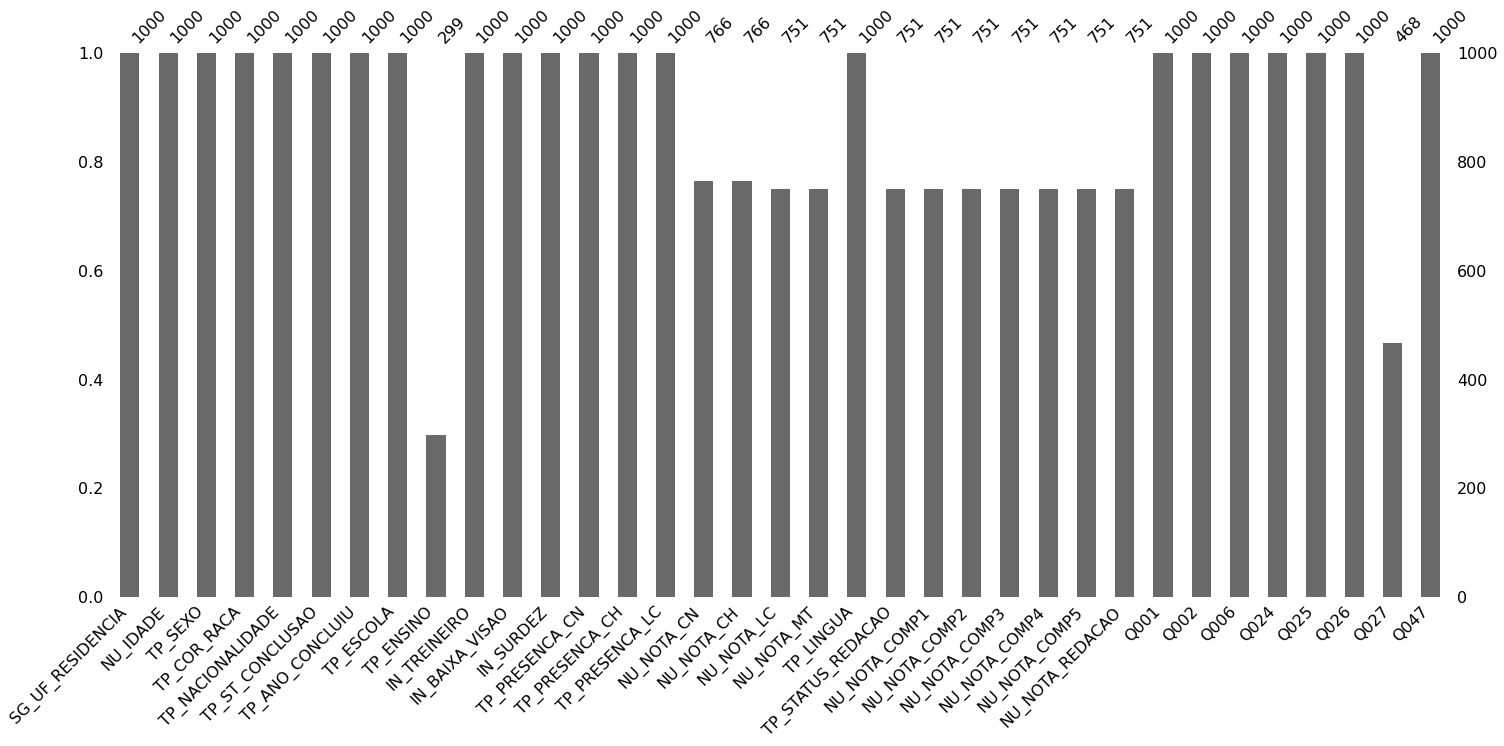

In [13]:
# APRESENTADO GRAFICAMENTE AS COLUNAS COM DADOS FALTANTES

msno.bar(df_train.sample(1000));

In [14]:
# PORCENTAGEM DE VALORES FALTANTES POR FEATURE

(df_train.isnull().sum() / df_train.shape[0]) * 100 

SG_UF_RESIDENCIA      0.000000
NU_IDADE              0.000000
TP_SEXO               0.000000
TP_COR_RACA           0.000000
TP_NACIONALIDADE      0.000000
TP_ST_CONCLUSAO       0.000000
TP_ANO_CONCLUIU       0.000000
TP_ESCOLA             0.000000
TP_ENSINO            68.812819
IN_TREINEIRO          0.000000
IN_BAIXA_VISAO        0.000000
IN_SURDEZ             0.000000
TP_PRESENCA_CN        0.000000
TP_PRESENCA_CH        0.000000
TP_PRESENCA_LC        0.000000
NU_NOTA_CN           24.683176
NU_NOTA_CH           24.683176
NU_NOTA_LC           26.198106
NU_NOTA_MT           26.198106
TP_LINGUA             0.000000
TP_STATUS_REDACAO    26.198106
NU_NOTA_COMP1        26.198106
NU_NOTA_COMP2        26.198106
NU_NOTA_COMP3        26.198106
NU_NOTA_COMP4        26.198106
NU_NOTA_COMP5        26.198106
NU_NOTA_REDACAO      26.198106
Q001                  0.000000
Q002                  0.000000
Q006                  0.000000
Q024                  0.000000
Q025                  0.000000
Q026    

In [15]:
# ELIMINANDO AS COLUNAS COM PORCENTAGEM ACIMA DE 50% DE VALORES FALTANTES

excluColsNull = ['TP_ENSINO', 'Q027'] 

df_train.drop(excluColsNull, axis = 1, inplace=True )

# As demais não iremos eliminar por que existe uma correlação interessante 
# entre elas e a nossa var Alvo

#### CORRELAÇÃO ENTRE AS VARIÁVEIS

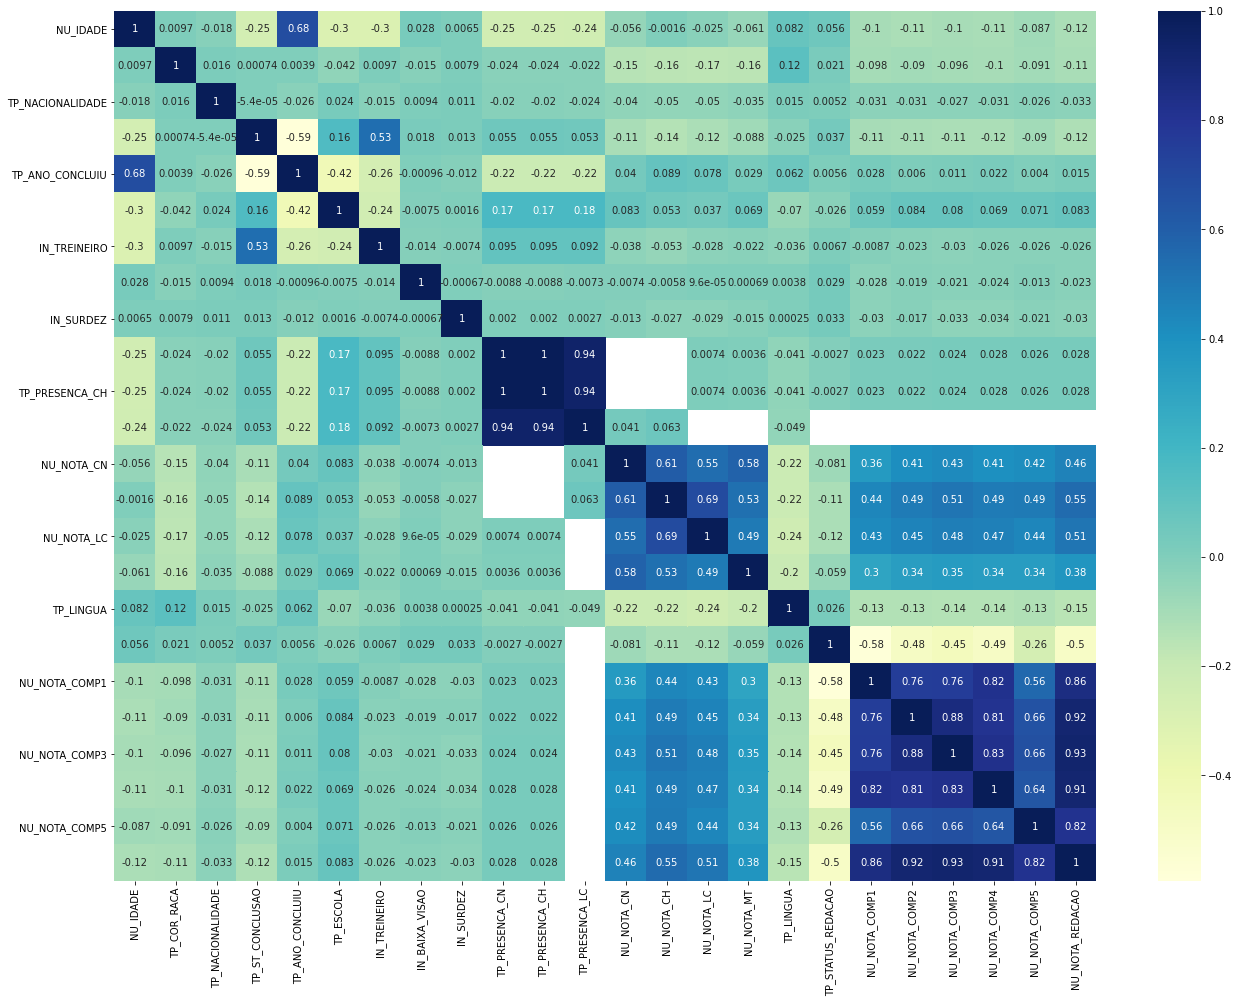

In [16]:
# POR MEIO DAS CORRELAÇÕES POSITIVAS E MAIS ALTAS, SELECIONAMOS AS FEATURES MAIS RELEVANTES PARA
# O NOSSO MODELO 

# 1º VAMOS VERIFICAR A CORRELAÇÃO DE TODAS AS VARIÁVEIS DO NOSSO CONJUNTO 

corrAlvo1 = sns.heatmap(df_train.corr(method = 'pearson'), annot=True, cmap = 'YlGnBu')

corrAlvo = plt.gcf()
corrAlvo.set_size_inches(22,16)
plt.show()

# PERCEBEMOS QUE ALGUMAS VARIÁVEIS APRESENTAM UM CORRELAÇÃO ALTA E POSISTIVA. VAMOS VÊ-LAS?

In [17]:
# CORRELAÇÃO ENTRE A NOTA DE MATEMÁTICA E OUTRAS NOTAS

df_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC', 
          'NU_NOTA_COMP1', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP2', 
          'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']].corr()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_REDACAO,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_MT,1.000000,0.584941,0.529594,0.494695,0.299402,0.379376,0.335638,0.350307,0.342282,0.343337
NU_NOTA_CN,0.584941,1.000000,0.609543,0.545667,0.357672,0.459938,0.412894,0.429447,0.407747,0.416349
NU_NOTA_CH,0.529594,0.609543,1.000000,0.692988,0.443809,0.550582,0.488050,0.510452,0.488797,0.494798
NU_NOTA_LC,0.494695,0.545667,0.692988,1.000000,0.430603,0.512908,0.453262,0.475390,0.467356,0.441696
NU_NOTA_COMP1,0.299402,0.357672,0.443809,0.430603,1.000000,0.862744,0.756664,0.759452,0.824538,0.558587
NU_NOTA_REDACAO,0.379376,0.459938,0.550582,0.512908,0.862744,1.000000,0.918278,0.925813,0.914505,0.816248
NU_NOTA_COMP2,0.335638,0.412894,0.488050,0.453262,0.756664,0.918278,1.000000,0.875447,0.808006,0.655915
NU_NOTA_COMP3,0.350307,0.429447,0.510452,0.475390,0.759452,0.925813,0.875447,1.000000,0.827151,0.664350
NU_NOTA_COMP4,0.342282,0.407747,0.488797,0.467356,0.824538,0.914505,0.808006,0.827151,1.000000,0.635018
NU_NOTA_COMP5,0.343337,0.416349,0.494798,0.441696,0.558587,0.816248,0.655915,0.664350,0.635018,1.000000


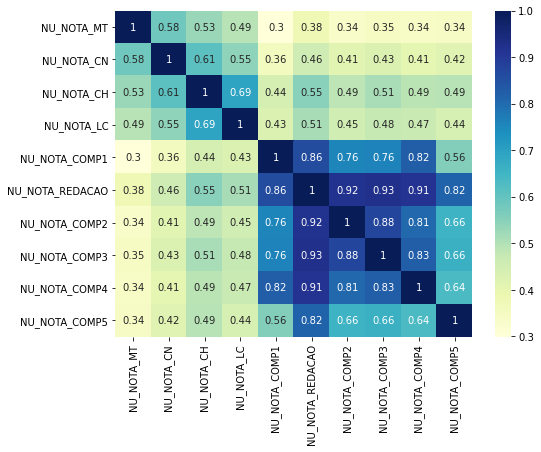

In [18]:
# CORRELAÇÃO ENTRE A NOTA DE MATEMÁTICA E OUTRAS NOTAS - GRAFICAMENTE

corrAlvo1 = sns.heatmap(df_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC', 
                                  'NU_NOTA_COMP1', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP2', 
                                  'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']]
                                  .corr(method = 'pearson'), annot = True, cmap = 'YlGnBu')
corrAlvo = plt.gcf()
corrAlvo.set_size_inches(8,6)
plt.show()

In [19]:
# CORRELAÇÃO ENTRE AS FALTAS NAS PROVAS 

df_train[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']].corr()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC
TP_PRESENCA_CN,1.000000,1.000000,0.943361
TP_PRESENCA_CH,1.000000,1.000000,0.943361
TP_PRESENCA_LC,0.943361,0.943361,1.000000


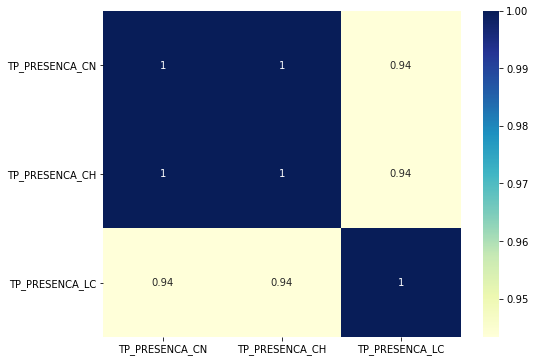

In [20]:
# CORRELAÇÃO ENTRE AS PRESENÇAS NAS PROVAS - GRAFICAMENTE

corrAlvo2 = sns.heatmap(df_train[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC']]
               .corr(method='pearson'), annot=True, cmap='YlGnBu')
corrAlvo=plt.gcf()
corrAlvo.set_size_inches(8,6)
plt.show()

# Percebemos que existe uma correlação muito alta entre faltas nas provas de outras disciplinas 
# e faltas na prova de matemática. Assim, concluímos que alunos que faltam em outras provas tendem
# a faltar também na prova de matemática.

In [21]:
# EMBORA A NOTAS DE COMPETENCIA POSSUAM UMA CORRELAÇÃO BOA. A NOTA DE REDAÇÃO É A SOMA DAS 
# COMPETENCIAS 1,2,3,4 e 5, ASSIM, VAMOS EXCLUIR ESSAS INFORMAÇÕES E TRABALHAR APENAS COM A NOTA DA REDAÇÃO

excluColsNull_1 = ['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5']

df_train.drop(excluColsNull_1, axis=1, inplace=True)

In [22]:
# COMO ESTÁ NOSSO CONJ. DE DADOS AGORA?
df_train.shape

(13730, 28)

In [23]:
# APÓS A LIMPEZA NOSSO CONJ DE DADOS PERMANECE COM AS SEGUINTES COLUNAS
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SG_UF_RESIDENCIA   13730 non-null  object 
 1   NU_IDADE           13730 non-null  int64  
 2   TP_SEXO            13730 non-null  object 
 3   TP_COR_RACA        13730 non-null  int64  
 4   TP_NACIONALIDADE   13730 non-null  int64  
 5   TP_ST_CONCLUSAO    13730 non-null  int64  
 6   TP_ANO_CONCLUIU    13730 non-null  int64  
 7   TP_ESCOLA          13730 non-null  int64  
 8   IN_TREINEIRO       13730 non-null  int64  
 9   IN_BAIXA_VISAO     13730 non-null  int64  
 10  IN_SURDEZ          13730 non-null  int64  
 11  TP_PRESENCA_CN     13730 non-null  int64  
 12  TP_PRESENCA_CH     13730 non-null  int64  
 13  TP_PRESENCA_LC     13730 non-null  int64  
 14  NU_NOTA_CN         10341 non-null  float64
 15  NU_NOTA_CH         10341 non-null  float64
 16  NU_NOTA_LC         101

#### ANÁLISE DAS NOTAS DE MATEMÁTICA

##### POR SEXO

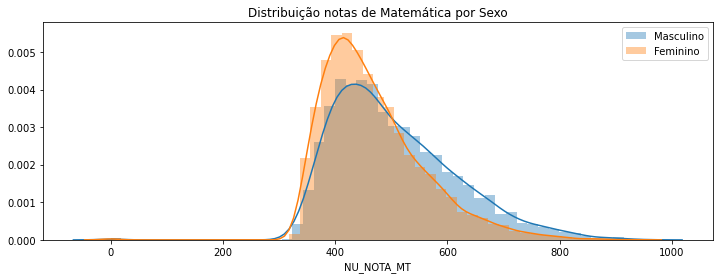

In [24]:
# DISTRIBUIÇÃO DAS NOTAS DE MATEMÁTICA POR SEXO
plt.figure(figsize=(12,4))
plt.title('Distribuição notas de Matemática por Sexo')
sns.distplot(df_train[df_train['TP_SEXO'] == 'M']['NU_NOTA_MT'], kde=True,bins=50, label='Masculino')
sns.distplot(df_train[df_train['TP_SEXO'] == 'F']['NU_NOTA_MT'], kde=True,bins=50, label='Feminino')
plt.legend()
plt.show()

<Figure size 1008x288 with 0 Axes>

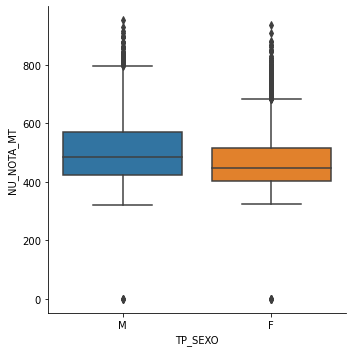

In [25]:
plt.figure(figsize=(14,4))
ax = sns.catplot(x='TP_SEXO', y='NU_NOTA_MT', data = df_train, kind="box")
plt.show();

In [26]:
# MÉDIA DAS NOTAS DE MATEMÁTICA POR SEXO
df_train.groupby('TP_SEXO')['NU_NOTA_MT'].mean()

TP_SEXO
F    468.036671
M    505.881689
Name: NU_NOTA_MT, dtype: float64

In [27]:
# DESVIO PADRÃO DAS NOTAS DE MATEMÁTICA POR SEXO
df_train.groupby('TP_SEXO')['NU_NOTA_MT'].std()

TP_SEXO
F     90.833051
M    108.883130
Name: NU_NOTA_MT, dtype: float64

In [28]:
# MEDIANA DAS NOTAS DE MATEMÁTICA POR SEXO
df_train.groupby('TP_SEXO')['NU_NOTA_MT'].median()

TP_SEXO
F    448.9
M    484.4
Name: NU_NOTA_MT, dtype: float64

##### POR RAÇA

/home/tiago/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/tiago/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tiago/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


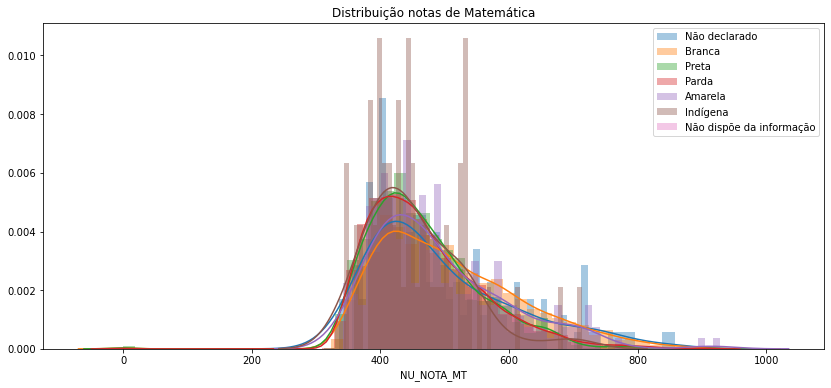

In [29]:
# Distribuição das notas de matemática por Raça

plt.figure(figsize=(14,6))
plt.title('Distribuição notas de Matemática')
sns.distplot(df_train[df_train['TP_COR_RACA']==0]['NU_NOTA_MT'], kde=True,bins=50, label='Não declarado')
sns.distplot(df_train[df_train['TP_COR_RACA']==1]['NU_NOTA_MT'], kde=True,bins=50, label='Branca')
sns.distplot(df_train[df_train['TP_COR_RACA']==2]['NU_NOTA_MT'], kde=True,bins=50, label='Preta')
sns.distplot(df_train[df_train['TP_COR_RACA']==3]['NU_NOTA_MT'], kde=True,bins=50, label='Parda')
sns.distplot(df_train[df_train['TP_COR_RACA']==4]['NU_NOTA_MT'], kde=True,bins=50, label='Amarela')
sns.distplot(df_train[df_train['TP_COR_RACA']==5]['NU_NOTA_MT'], kde=True,bins=50, label='Indígena ')
sns.distplot(df_train[df_train['TP_COR_RACA']==6]['NU_NOTA_MT'], kde=True,bins=50, label='Não dispõe da informação')
plt.legend()
plt.show();

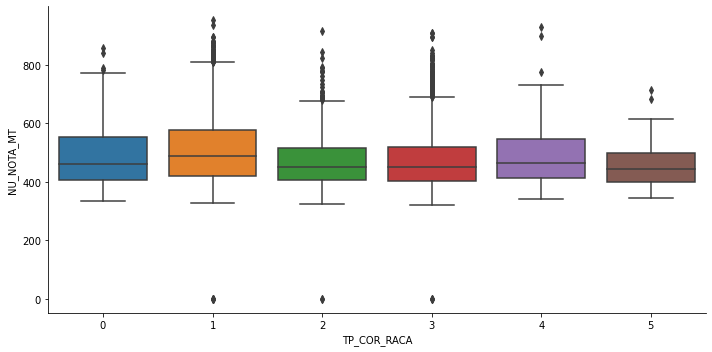

In [30]:
ax1 = sns.catplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=df_train, kind='box', aspect=2)
# plt.legend(labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 
#                      'Não dispõe da informação'], ncol=7, loc='upper left')
plt.show()



In [31]:
# MÉDIA DAS NOTAS DE MATEMÁTICA POR RAÇA
df_train.groupby('TP_COR_RACA')['NU_NOTA_MT'].mean()

TP_COR_RACA
0    493.780952
1    507.365215
2    467.069823
3    468.634257
4    490.326316
5    453.979688
Name: NU_NOTA_MT, dtype: float64

In [32]:
# DESVIO PADRÃO DAS NOTAS DE MATEMÁTICA POR RAÇA
df_train.groupby('TP_COR_RACA')['NU_NOTA_MT'].std()

TP_COR_RACA
0    112.637744
1    111.866761
2     86.987807
3     89.558678
4    104.088773
5     75.670304
Name: NU_NOTA_MT, dtype: float64

In [33]:
# MEDIANA DAS NOTAS DE MATEMÁTICA POR RAÇA
df_train.groupby('TP_COR_RACA')['NU_NOTA_MT'].median()

TP_COR_RACA
0    460.55
1    487.50
2    451.80
3    450.70
4    464.80
5    442.35
Name: NU_NOTA_MT, dtype: float64

#### ANALIZANDO AS NOTAS DE MATEMÁTICA DOS CANDIDATOS QUE FORAM DESCLASSIFICADOS OU FALTARAM EM OUTRAS PROVAS

##### FALTAS E DESCLASSIFICAÇÃO EM CN

In [34]:
# NÚMERO DE CANDIDATOS QUE FALTARAM OU FORAM DESCLASSIFICADOS NA PROVA DE Ciências da Natureza

Nota_CN_Missing = df_train[(df_train['NU_NOTA_CN'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_CN_Missing

3389

In [35]:
# DOS CANDIDATOS, QUANTOS FORAM DESCLASSIFICADOS OU FALTARAM NA PROVA DE MATEMÁTICA?
df_train[(df_train['NU_NOTA_CH'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == True)].shape[0]

3353

In [36]:
# PORCENTAGEM DE CANDIDATOS QUE FORAM DESCLASSIFICADOS OU FALTARAM EM CN, MAS TIVERAM ALGUMA NOTA 
# EM MATEMÁTICAa 

(df_train[(df_train['NU_NOTA_CN'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == False)].shape[0]/Nota_CN_Missing)*100

# Observe que apenas 1% das pessoas que foram desclassificadas ou faltaram em Ciências da Natureza, 
# tiveram alguma nota em Matemática

1.0622602537621717

In [37]:
# PORCENTAGEM DOS CANDIDATOS CLASSIFICADOS ANALIZANDO ESSE QUESITO
(df_train[(df_train['NU_NOTA_CN'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_CN_Missing)*100

98.93773974623782

In [38]:
outlier_CN = list(df_train[(df_train['NU_NOTA_CN'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == False)].index)

In [39]:
# QUANTOS SÃO OS OUTLIERS?
len(outlier_CN)

36

In [40]:
# QUAIS SÃO ELES?
df_train[(df_train['NU_NOTA_CN'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == False)]['NU_NOTA_MT']

429        0.0
1000     445.4
1662     397.6
1805     466.8
1809     329.0
1843     381.1
2760     454.5
2946     472.6
3785     461.2
4202     409.3
4340     453.6
5124     389.6
5340     608.3
5797     392.7
6065     550.9
6388     417.9
6958     404.6
7126     441.3
7258     440.9
7656     445.2
7738     566.9
7773     336.3
7921     413.6
8064     407.8
8229     399.7
8964     383.9
9485     401.6
9495     393.4
10867    568.2
11385    445.3
12212    590.6
12615    367.8
12628    610.3
12652    878.3
13188    373.2
13318    348.8
Name: NU_NOTA_MT, dtype: float64

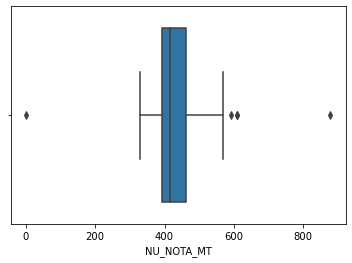

In [41]:
sns.boxplot(df_train[(df_train['NU_NOTA_CN'].isnull() == True)]['NU_NOTA_MT'])

##### FALTAS E DESCLASSIFICAÇÃO EM CH

In [42]:
# Número de candidatos que faltaram ou foram desclassificadas na prova de Ciências Humanas

Nota_CH_Missing = df_train[(df_train['NU_NOTA_CH'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_CH_Missing

3389

In [43]:
df_train[(df_train['NU_NOTA_CH'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == True)].shape[0]

3353

In [44]:
# Porcentagem de candidatos que foram desclassificados ou faltaram em CH, mas tiveram alguma 
#nota em Matemática
(df_train[(df_train['NU_NOTA_CH'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == False)].shape[0]/Nota_CH_Missing)*100

1.0622602537621717

In [45]:
# Porcentagem de candidatos que estavam presentes em ambas as provas
(df_train[(df_train['NU_NOTA_CH'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_CH_Missing)*100

98.93773974623782

In [46]:
outlier_CH = list(df_train[(df_train['NU_NOTA_CH'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == False)].index)

In [47]:
len(outlier_CH)

36

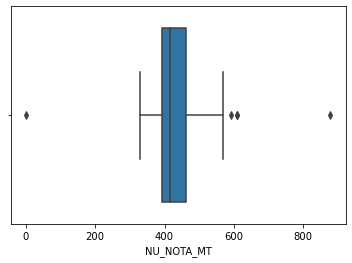

In [48]:
sns.boxplot(df_train[(df_train['NU_NOTA_CH'].isnull() == True)]['NU_NOTA_MT'])

##### FALTAS E DESCLASSIFICAÇÃO EM LC

In [49]:
# NÚMERO DE PESSOAS QUE FALTARAM OU FORAM DESCLASSIFICADAS NA PROVA DE LINGUAGENS E CÓDIGOS

Nota_LC_Missing = df_train[(df_train['NU_NOTA_LC'].isnull() == True)]['NU_NOTA_MT'].shape[0]
Nota_LC_Missing

3597

In [50]:
# DOS CANDIDATOS, QUANTOS FORAM DESCLASSIFICADOS OU FALTARAM NA PROVA DE MATEMÁTICA?
df_train[(df_train['NU_NOTA_LC'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == True)].shape[0]

3597

In [51]:
# PORCENTAGEM DE CANDIDATOS QUE FORAM DESCLASSIFICADOS OU FALTARAM EM LC, MAS TIVERAM ALGUMA 
# NOTA EM MATEMÁTICA

(df_train[(df_train['NU_NOTA_LC'].isnull() == True)&(df_train['NU_NOTA_MT'].isnull() == True)].shape[0]/Nota_LC_Missing)*100

100.0

#### ELIMINANDO NOTAS DE MATEMÁTICA IGUAL A ZERO

In [52]:
df_train[(df_train['NU_NOTA_MT']==0)].shape[0]

10

In [53]:
notaMT0 = df_train[df_train['NU_NOTA_MT']== 0]['NU_NOTA_MT']
notaMT0

111      0.0
429      0.0
3442     0.0
3783     0.0
4927     0.0
7352     0.0
7596     0.0
8397     0.0
11645    0.0
13600    0.0
Name: NU_NOTA_MT, dtype: float64

In [54]:
outlier_MT = list(df_train[(df_train['NU_NOTA_MT']==0)].index)
outlier_MT

[111, 429, 3442, 3783, 4927, 7352, 7596, 8397, 11645, 13600]

#### ELIMINADO OUTLIERS 

In [55]:
# EXCLUSÃO DE DADOS NOS QUAIS O CANDIDATO FALTOU EM CN, CH OU TEVE NOTA EM MATEMÁTICA IGUAL A ZERO

outliers = list(set(outlier_CN + outlier_CH + outlier_MT))
outliers

[8064,
 2946,
 5124,
 8964,
 13188,
 13318,
 1805,
 9485,
 1809,
 9495,
 13600,
 5797,
 8229,
 7596,
 429,
 6958,
 6065,
 1843,
 12212,
 7352,
 7738,
 4927,
 12615,
 2760,
 3785,
 3783,
 8397,
 12628,
 7126,
 7258,
 5340,
 7773,
 1000,
 7656,
 4202,
 12652,
 111,
 7921,
 3442,
 10867,
 4340,
 6388,
 11385,
 11645,
 1662]

In [56]:
len(outliers)

45

In [57]:
df_train= df_train.drop(outliers)

In [58]:
df_train[(df_train['TP_PRESENCA_CN']==0) &(df_train['NU_NOTA_MT']>600)].shape[0]

0

In [59]:
df_train[(df_train['TP_PRESENCA_CH']==0) &(df_train['NU_NOTA_MT']>600)].shape[0]

0

In [60]:
outliersCN = list((df_train[(df_train['TP_PRESENCA_CN']==0) &(df_train['NU_NOTA_MT']>600)]).index)
outliersCN

[]

In [61]:
outliersCH = list((df_train[(df_train['TP_PRESENCA_CH']==0) &(df_train['NU_NOTA_MT']>600)]).index)
outliersCH

[]

In [62]:
outliersTP = list(set(outliersCN + outliersCH))

In [63]:
df_train= df_train.drop(outliersTP)

#### VERIFICACO A DISTRIBUIÇÃO DAS NOTAS LEVANDO EM CONSIDERAÇÃO OS VALORES FALTANTES

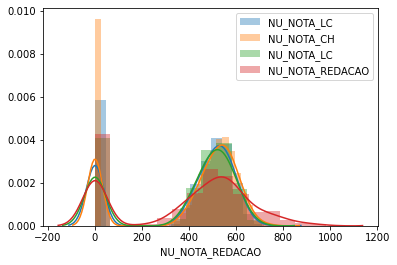

In [64]:
sns.distplot(df_train['NU_NOTA_LC'].fillna(0), label='NU_NOTA_LC')
sns.distplot(df_test['NU_NOTA_CH'].fillna(0), label='NU_NOTA_CH')
sns.distplot(df_test['NU_NOTA_LC'].fillna(0), label='NU_NOTA_LC')
sns.distplot(df_test['NU_NOTA_REDACAO'].fillna(0), label='NU_NOTA_REDACAO')
plt.legend()
plt.show()

In [65]:
# INFERIR ZERO AOS DADOS FALTANTES. PARTINDO DA IDÉIA QUE FALTA IMPLICA EM NOTA ZERO

df_train = df_train.fillna(value={'NU_NOTA_CN':0,'NU_NOTA_CH':0,'NU_NOTA_LC':0,
                                  'NU_NOTA_REDACAO':0, 'TP_STATUS_REDACAO':0, 'NU_NOTA_MT':0})

In [66]:
# PORCENTAGEM DE VALORES FALTANTES POR FEATURE

(df_train.isnull().sum() / df_train.shape[0]) * 100 

SG_UF_RESIDENCIA     0.0
NU_IDADE             0.0
TP_SEXO              0.0
TP_COR_RACA          0.0
TP_NACIONALIDADE     0.0
TP_ST_CONCLUSAO      0.0
TP_ANO_CONCLUIU      0.0
TP_ESCOLA            0.0
IN_TREINEIRO         0.0
IN_BAIXA_VISAO       0.0
IN_SURDEZ            0.0
TP_PRESENCA_CN       0.0
TP_PRESENCA_CH       0.0
TP_PRESENCA_LC       0.0
NU_NOTA_CN           0.0
NU_NOTA_CH           0.0
NU_NOTA_LC           0.0
NU_NOTA_MT           0.0
TP_LINGUA            0.0
TP_STATUS_REDACAO    0.0
NU_NOTA_REDACAO      0.0
Q001                 0.0
Q002                 0.0
Q006                 0.0
Q024                 0.0
Q025                 0.0
Q026                 0.0
Q047                 0.0
dtype: float64

In [67]:
df_train.columns.values

array(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006',
       'Q024', 'Q025', 'Q026', 'Q047'], dtype=object)

In [68]:
df_train.shape

(13685, 28)

In [69]:
# TRANSFOAMNDO DADOS DE TEXTUAIS EM NÚMERICOS

from sklearn.preprocessing import LabelEncoder

var_cat1 = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO','Q001','Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']

le = LabelEncoder()

for i in var_cat1: 
    df_train[i] = le.fit_transform(df_train[i].astype(str))
    df_train.dtypes

In [70]:
df_train.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,22,24,1,1,1,0,4,0,0,0,0,1,1,1,436.3,495.4,581.2,399.4,1,1,520.0,3,3,2,0,0,2,0
1,5,17,0,3,1,1,0,1,0,0,0,1,1,1,474.5,544.1,599.0,459.8,1,1,580.0,0,0,1,0,0,0,0
2,5,21,0,3,1,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0.0,3,3,2,0,0,0,0
3,18,25,0,0,1,0,9,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,7,4,4,2,1,2,3
4,2,28,1,2,1,0,4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0.0,4,3,2,0,0,1,0


In [71]:
df_train.shape

(13685, 28)

In [72]:
# DUMMIES DE VARIÁVEIS CATEGÓRICAS

var_cat2 = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO','Q025', 'Q026', 'Q047']

df_train = pd.get_dummies(df_train, columns = var_cat2).copy()

In [73]:
df_train.shape

(13685, 96)

In [74]:
df_train.head()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,SG_UF_RESIDENCIA_0,SG_UF_RESIDENCIA_1,SG_UF_RESIDENCIA_2,SG_UF_RESIDENCIA_3,SG_UF_RESIDENCIA_4,SG_UF_RESIDENCIA_5,SG_UF_RESIDENCIA_6,SG_UF_RESIDENCIA_7,SG_UF_RESIDENCIA_8,SG_UF_RESIDENCIA_9,SG_UF_RESIDENCIA_10,SG_UF_RESIDENCIA_11,SG_UF_RESIDENCIA_12,SG_UF_RESIDENCIA_13,SG_UF_RESIDENCIA_14,SG_UF_RESIDENCIA_15,SG_UF_RESIDENCIA_16,SG_UF_RESIDENCIA_17,SG_UF_RESIDENCIA_18,SG_UF_RESIDENCIA_19,SG_UF_RESIDENCIA_20,SG_UF_RESIDENCIA_21,SG_UF_RESIDENCIA_22,SG_UF_RESIDENCIA_23,SG_UF_RESIDENCIA_24,SG_UF_RESIDENCIA_25,SG_UF_RESIDENCIA_26,TP_SEXO_0,TP_SEXO_1,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_0,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_0,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_SURDEZ_0,IN_SURDEZ_1,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,TP_PRESENCA_CN_2,TP_PRESENCA_CH_0,TP_PRESENCA_CH_1,TP_PRESENCA_CH_2,TP_PRESENCA_LC_0,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_0,TP_STATUS_REDACAO_1,TP_STATUS_REDACAO_2,TP_STATUS_REDACAO_3,TP_STATUS_REDACAO_4,TP_STATUS_REDACAO_5,TP_STATUS_REDACAO_6,TP_STATUS_REDACAO_7,TP_STATUS_REDACAO_8,TP_STATUS_REDACAO_9,Q025_0,Q025_1,Q026_0,Q026_1,Q026_2,Q047_0,Q047_1,Q047_2,Q047_3,Q047_4
0,24,4,436.3,495.4,581.2,399.4,520.0,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,17,0,474.5,544.1,599.0,459.8,580.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,21,0,0.0,0.0,0.0,0.0,0.0,3,3,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,25,9,0.0,0.0,0.0,0.0,0.0,7,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,28,4,0.0,0.0,0.0,0.0,0.0,4,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


#### CONJ. DE DADOS DE TESTE

In [75]:
df_test.shape

(4576, 47)

In [76]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [77]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [78]:
# EXCLUINDO COLUNAS IRRELEVANTES

colsExclud_test = ['CO_UF_RESIDENCIA', 'TP_DEPENDENCIA_ADM_ESC', 
                   'IN_CEGUEIRA', 'IN_DISLEXIA', 'IN_SABATISTA', 'IN_GESTANTE', 
                   'IN_IDOSO', 'CO_PROVA_CN', 'CO_PROVA_CH', 
                   'CO_PROVA_LC', 'CO_PROVA_MT', 'IN_DISCALCULIA']

# Removendo as colunas analisadas do conj. de teste
df_test.drop(colsExclud_test, axis=1, inplace=True)

In [79]:
df_test.shape

(4576, 35)

In [80]:
df_test.shape

(4576, 35)

In [81]:
# EMBORA A NOTAS DE COMPETENCIA POSSUAM UMA CORRELAÇÃO BOA. A NOTA DE REDAÇÃO É A SOMA DAS 
# COMPETENCIAS 1,2,3,4 e 5, ASSIM, VAMOS EXCLUIR ESSAS INFORMAÇÕES E TRABALHAR APENAS COM A NOTA DA REDAÇÃO

excluColsNull_t1 = ['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5']

df_test.drop(excluColsNull_t1, axis=1, inplace=True)

In [82]:
df_test.shape

(4576, 30)

In [83]:
# CALCULANDO A PORCENTAGEM DE VALORES MISSING NO RESTANTE DO CONJ. DE DADOS

(df_test.isnull().sum() / df_test.shape[0]) * 100

NU_INSCRICAO          0.000000
SG_UF_RESIDENCIA      0.000000
NU_IDADE              0.000000
TP_SEXO               0.000000
TP_COR_RACA           0.000000
TP_NACIONALIDADE      0.000000
TP_ST_CONCLUSAO       0.000000
TP_ANO_CONCLUIU       0.000000
TP_ESCOLA             0.000000
TP_ENSINO            67.657343
IN_TREINEIRO          0.000000
IN_BAIXA_VISAO        0.000000
IN_SURDEZ             0.000000
TP_PRESENCA_CN        0.000000
TP_PRESENCA_CH        0.000000
TP_PRESENCA_LC        0.000000
NU_NOTA_CN           24.781469
NU_NOTA_CH           24.781469
NU_NOTA_LC           26.201923
TP_LINGUA             0.000000
TP_STATUS_REDACAO    26.201923
NU_NOTA_REDACAO      26.201923
Q001                  0.000000
Q002                  0.000000
Q006                  0.000000
Q024                  0.000000
Q025                  0.000000
Q026                  0.000000
Q027                 54.370629
Q047                  0.000000
dtype: float64

In [84]:
# ELIMINANDO AS COLUNAS COM PORCENTAGEM ACIMA DE 50% DE VALORES FALTANTES

excluColsNull_t = ['TP_ENSINO', 'Q027'] 

df_test.drop(excluColsNull_t, axis=1, inplace=True)

In [85]:
df_test.shape

(4576, 28)

In [86]:
df_test = df_test.fillna(value={'NU_NOTA_CN':0,'NU_NOTA_CH':0,'NU_NOTA_LC':0,
                                'NU_NOTA_REDACAO':0, 'TP_STATUS_REDACAO':0})

In [87]:
# Calculando a porcentagem de valores MIssing no restante do Conj. de dados
(df_test.isnull().sum() / df_test.shape[0]) * 100 

NU_INSCRICAO         0.0
SG_UF_RESIDENCIA     0.0
NU_IDADE             0.0
TP_SEXO              0.0
TP_COR_RACA          0.0
TP_NACIONALIDADE     0.0
TP_ST_CONCLUSAO      0.0
TP_ANO_CONCLUIU      0.0
TP_ESCOLA            0.0
IN_TREINEIRO         0.0
IN_BAIXA_VISAO       0.0
IN_SURDEZ            0.0
TP_PRESENCA_CN       0.0
TP_PRESENCA_CH       0.0
TP_PRESENCA_LC       0.0
NU_NOTA_CN           0.0
NU_NOTA_CH           0.0
NU_NOTA_LC           0.0
TP_LINGUA            0.0
TP_STATUS_REDACAO    0.0
NU_NOTA_REDACAO      0.0
Q001                 0.0
Q002                 0.0
Q006                 0.0
Q024                 0.0
Q025                 0.0
Q026                 0.0
Q047                 0.0
dtype: float64

In [88]:
# TRANSFORMANDO DADOS DE TEXTUAIS EM NUMÉRICOS

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in var_cat1: 
    df_test[i] = le.fit_transform(df_test[i].astype(str))
    df_test.dtypes

In [89]:
df_test.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_SURDEZ,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,17,22,0,3,1,0,5,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1,420.0,1,0,2,0,0,2,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,9,26,0,3,1,0,8,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1,580.0,4,1,2,1,1,1,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,5,21,1,1,1,1,0,1,0,0,0,1,1,1,595.9,622.7,613.6,0,1,320.0,4,4,3,1,1,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,13,27,0,3,1,0,8,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,7,4,6,1,1,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,17,18,1,1,1,1,0,1,0,0,0,1,1,1,592.9,492.6,571.4,1,1,320.0,3,7,7,2,1,0,0


In [90]:
cat_features_t = ['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA',
                  'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ESCOLA',
                  'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ','TP_PRESENCA_CN', 
                  'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_LINGUA', 
                  'TP_STATUS_REDACAO','Q025', 'Q026', 'Q047']

In [91]:
df_test1 = pd.get_dummies(df_test, columns = cat_features_t).copy()

In [92]:
df_test1.head()

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,SG_UF_RESIDENCIA_0,SG_UF_RESIDENCIA_1,SG_UF_RESIDENCIA_2,SG_UF_RESIDENCIA_3,SG_UF_RESIDENCIA_4,SG_UF_RESIDENCIA_5,SG_UF_RESIDENCIA_6,SG_UF_RESIDENCIA_7,SG_UF_RESIDENCIA_8,SG_UF_RESIDENCIA_9,SG_UF_RESIDENCIA_10,SG_UF_RESIDENCIA_11,SG_UF_RESIDENCIA_12,SG_UF_RESIDENCIA_13,SG_UF_RESIDENCIA_14,SG_UF_RESIDENCIA_15,SG_UF_RESIDENCIA_16,SG_UF_RESIDENCIA_17,SG_UF_RESIDENCIA_18,SG_UF_RESIDENCIA_19,SG_UF_RESIDENCIA_20,SG_UF_RESIDENCIA_21,SG_UF_RESIDENCIA_22,SG_UF_RESIDENCIA_23,SG_UF_RESIDENCIA_24,SG_UF_RESIDENCIA_25,SG_UF_RESIDENCIA_26,TP_SEXO_0,TP_SEXO_1,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_0,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ESCOLA_0,TP_ESCOLA_1,TP_ESCOLA_2,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_SURDEZ_0,IN_SURDEZ_1,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,TP_PRESENCA_CH_0,TP_PRESENCA_CH_1,TP_PRESENCA_LC_0,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_0,TP_STATUS_REDACAO_1,TP_STATUS_REDACAO_2,TP_STATUS_REDACAO_3,TP_STATUS_REDACAO_4,TP_STATUS_REDACAO_5,TP_STATUS_REDACAO_6,TP_STATUS_REDACAO_7,TP_STATUS_REDACAO_8,TP_STATUS_REDACAO_9,Q025_0,Q025_1,Q026_0,Q026_1,Q026_2,Q047_0,Q047_1,Q047_2,Q047_3,Q047_4
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,5,464.8,443.5,431.8,420.0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,8,391.1,491.1,548.0,580.0,4,1,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,0,595.9,622.7,613.6,320.0,4,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,8,0.0,0.0,0.0,0.0,7,4,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,0,592.9,492.6,571.4,320.0,3,7,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [93]:
colunas_df_t1 = list(df_test1.columns)
colunas_df2 = list(df_train.columns)

for i in colunas_df2:
    if i not in colunas_df_t1:
        print(i)

NU_NOTA_MT
TP_ESCOLA_3
TP_PRESENCA_CN_2
TP_PRESENCA_CH_2


In [94]:
df_train=df_train.drop(columns=['TP_PRESENCA_CN_2','TP_PRESENCA_CH_2', 'TP_ESCOLA_3'])

In [95]:
colsExclud_3 =[ 'SG_UF_RESIDENCIA_0', 'TP_SEXO_0','TP_COR_RACA_0','TP_NACIONALIDADE_0','TP_ST_CONCLUSAO_3',
         'IN_TREINEIRO_0','IN_BAIXA_VISAO_0','IN_SURDEZ_0','TP_PRESENCA_CN_0',
         'TP_PRESENCA_CH_0','TP_PRESENCA_LC_0','TP_LINGUA_1','TP_STATUS_REDACAO_0','Q025_0', 'Q026_0']

df_train_2 = df_train.drop(columns=colsExclud_3)
df_test1 = df_test1.drop(columns=colsExclud_3)

In [96]:
df_train_2.columns.values

array(['NU_IDADE', 'TP_ANO_CONCLUIU', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'SG_UF_RESIDENCIA_1', 'SG_UF_RESIDENCIA_2',
       'SG_UF_RESIDENCIA_3', 'SG_UF_RESIDENCIA_4', 'SG_UF_RESIDENCIA_5',
       'SG_UF_RESIDENCIA_6', 'SG_UF_RESIDENCIA_7', 'SG_UF_RESIDENCIA_8',
       'SG_UF_RESIDENCIA_9', 'SG_UF_RESIDENCIA_10', 'SG_UF_RESIDENCIA_11',
       'SG_UF_RESIDENCIA_12', 'SG_UF_RESIDENCIA_13',
       'SG_UF_RESIDENCIA_14', 'SG_UF_RESIDENCIA_15',
       'SG_UF_RESIDENCIA_16', 'SG_UF_RESIDENCIA_17',
       'SG_UF_RESIDENCIA_18', 'SG_UF_RESIDENCIA_19',
       'SG_UF_RESIDENCIA_20', 'SG_UF_RESIDENCIA_21',
       'SG_UF_RESIDENCIA_22', 'SG_UF_RESIDENCIA_23',
       'SG_UF_RESIDENCIA_24', 'SG_UF_RESIDENCIA_25',
       'SG_UF_RESIDENCIA_26', 'TP_SEXO_1', 'TP_COR_RACA_1',
       'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5',
       'TP_NACIONALIDADE_1', 'TP_NACIONALIDADE_2', 'TP_NACIONALIDADE_3

#### MODELOS PREDITIVOS

In [97]:
# DIVIDINDO O NOSSO CONJUNTO EM TREINO E TESTE

X = df_train_2.drop(columns =['NU_NOTA_MT'], axis=1)
y = df_train_2['NU_NOTA_MT']

In [98]:
X.head()

,NU_IDADE,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,SG_UF_RESIDENCIA_1,SG_UF_RESIDENCIA_2,SG_UF_RESIDENCIA_3,SG_UF_RESIDENCIA_4,SG_UF_RESIDENCIA_5,SG_UF_RESIDENCIA_6,SG_UF_RESIDENCIA_7,SG_UF_RESIDENCIA_8,SG_UF_RESIDENCIA_9,SG_UF_RESIDENCIA_10,SG_UF_RESIDENCIA_11,SG_UF_RESIDENCIA_12,SG_UF_RESIDENCIA_13,SG_UF_RESIDENCIA_14,SG_UF_RESIDENCIA_15,SG_UF_RESIDENCIA_16,SG_UF_RESIDENCIA_17,SG_UF_RESIDENCIA_18,SG_UF_RESIDENCIA_19,SG_UF_RESIDENCIA_20,SG_UF_RESIDENCIA_21,SG_UF_RESIDENCIA_22,SG_UF_RESIDENCIA_23,SG_UF_RESIDENCIA_24,SG_UF_RESIDENCIA_25,SG_UF_RESIDENCIA_26,TP_SEXO_1,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_0,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ESCOLA_0,TP_ESCOLA_1,TP_ESCOLA_2,IN_TREINEIRO_1,IN_BAIXA_VISAO_1,IN_SURDEZ_1,TP_PRESENCA_CN_1,TP_PRESENCA_CH_1,TP_PRESENCA_LC_1,TP_PRESENCA_LC_2,TP_LINGUA_0,TP_STATUS_REDACAO_1,TP_STATUS_REDACAO_2,TP_STATUS_REDACAO_3,TP_STATUS_REDACAO_4,TP_STATUS_REDACAO_5,TP_STATUS_REDACAO_6,TP_STATUS_REDACAO_7,TP_STATUS_REDACAO_8,TP_STATUS_REDACAO_9,Q025_1,Q026_1,Q026_2,Q047_0,Q047_1,Q047_2,Q047_3,Q047_4
0,24,4,436.3,495.4,581.2,520.0,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,17,0,474.5,544.1,599.0,580.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,21,0,0.0,0.0,0.0,0.0,3,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,25,9,0.0,0.0,0.0,0.0,7,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,28,4,0.0,0.0,0.0,0.0,4,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [99]:
y.head()

0    399.4
1    459.8
2      0.0
3      0.0
4      0.0
Name: NU_NOTA_MT, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# NORMALIZANDO OS DADOS
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()  
# X_train = sc.fit_transform(X_train)  
# X_test = sc.transform(X_test)

#### MODELO RandomForestRegressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
model_lr = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

model_lr.fit(X_train, y_train)
#y_pred_lr = model_lr.predict(X_test)

RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=500, n_jobs=-1,
                      random_state=0)

In [102]:
y_pred_test = model_lr.predict(X_test)
y_pred_train = model_lr.predict(X_train)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

3984.090835230148

#### MÉTRICAS DE AVALIAÇÃO DO MODELO

In [104]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 38.18925292
MSE: 3200.89747863
RMSE: 56.5764746


In [105]:
X_testN = df_test1.drop(columns =['NU_INSCRICAO'], axis=1)

ypredict_test = model_lr.predict(X_testN)

In [106]:
df_test1['NU_NOTA_MT'] = ypredict_test

In [107]:
answer = df_test1[['NU_INSCRICAO','NU_NOTA_MT']]

In [108]:
# SALVANDO NOSSA RESPOSTA
answer.to_csv("answer.csv",index=False)